**step3**

# Univariate Analysis

Univariate Detection:

The univariate identification of outliers examines the distribution of observations for each variable in the analysis and selects as outliers those cases falling at the outlier range(high or low) of the distribution. A threshold is established which is mean+3*std where std is standard deviation. Any value which are falling above this threshold is termed as High outlier and any values which are falling below this threshold are termed as Low outlier. For that, we have to convert the data values to standard scores which have a mean of 0 and standard deviation of 1 by using method known as Standardization. Here one data frame is created



In [1]:
import pandas as pd
import numpy as np
dataset=pd.read_csv('adult.csv')
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# understand the probability and frequency distribution 

# to get a quick look at the counts from this for each category in there, we can use pandas 'value_counts'
freq_table = dataset['occupation'].value_counts()
freq_table

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

the result is actually a so called pandas series , which work similar as a dictionary with keys and values. 
These counts are the so-called absolute frequencies, defined as "the number of occurences of a particular phenomenon

lets keep the keys(the categories) and the values ( the frequencies) seperate:

In [4]:
my_keys = freq_table.keys()
my_keys

Index(['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving',
       'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
      dtype='object')

In [5]:
my_value = freq_table.values
my_value

array([6172, 6112, 6086, 5611, 5504, 4923, 3022, 2809, 2355, 2072, 1490,
       1446,  983,  242,   15], dtype=int64)

In [6]:
freq_table = pd.DataFrame({'occupation':my_keys , 'Frequency':my_value})
freq_table

,occupation,Frequency
0,Prof-specialty,6172
1,Craft-repair,6112
2,Exec-managerial,6086
3,Adm-clerical,5611
4,Sales,5504
5,Other-service,4923
6,Machine-op-inspct,3022
7,?,2809
8,Transport-moving,2355
9,Handlers-cleaners,2072


In [7]:
# alphabetical order of the categories 

freq_table = freq_table.sort_values(by=['occupation'])
freq_table = freq_table.reset_index(drop=True)
freq_table

,occupation,Frequency
0,?,2809
1,Adm-clerical,5611
2,Armed-Forces,15
3,Craft-repair,6112
4,Exec-managerial,6086
5,Farming-fishing,1490
6,Handlers-cleaners,2072
7,Machine-op-inspct,3022
8,Other-service,4923
9,Priv-house-serv,242


lets add the percentage can be defined as "a way of expressing ratio in terms of whole numbers.
A ratio of fraction is converted to a percentage by multiplying by 100 and appending a "percentage sign"%"

In [8]:
freq_table['Percent'] = freq_table['Frequency']/freq_table['Frequency'].sum()*100
freq_table

,occupation,Frequency,Percent
0,?,2809,5.751198
1,Adm-clerical,5611,11.488064
2,Armed-Forces,15,0.030711
3,Craft-repair,6112,12.513820
4,Exec-managerial,6086,12.460587
5,Farming-fishing,1490,3.050653
6,Handlers-cleaners,2072,4.242251
7,Machine-op-inspct,3022,6.187298
8,Other-service,4923,10.079440
9,Priv-house-serv,242,0.495475


In [9]:
# also add cumulative percentage.The word 'cumulative' simply means to add up.
# The cumulative frequency can be defined as:'the total(absolute) frequency up to the upper boundry of that class'

freq_table['Cumulative Percent']=freq_table['Frequency'].cumsum()/freq_table['Frequency'].sum()*100
freq_table

,occupation,Frequency,Percent,Cumulative Percent
0,?,2809,5.751198,5.751198
1,Adm-clerical,5611,11.488064,17.239261
2,Armed-Forces,15,0.030711,17.269973
3,Craft-repair,6112,12.513820,29.783793
4,Exec-managerial,6086,12.460587,42.244380
5,Farming-fishing,1490,3.050653,45.295033
6,Handlers-cleaners,2072,4.242251,49.537283
7,Machine-op-inspct,3022,6.187298,55.724581
8,Other-service,4923,10.079440,65.804021
9,Priv-house-serv,242,0.495475,66.299496


# Missing values

if we take a look at the original data frame, and number of records:

In [14]:
len(dataset['occupation'])

48842

now, compare this to the sum of our frequency table:

In [15]:
sum(freq_table['Frequency'])

48842

It seems like we are able to read all data. we are unable to miss our data

In [23]:
freq_table = dataset['marital-status'].value_counts()
# freq_table

my_keys = freq_table.keys()
# my_keys

my_value = freq_table.values
# my_value

freq_table = pd.DataFrame({'marital-status':my_keys , 'Frequency':my_value})
# freq_table

freq_table = freq_table.sort_values(by=['marital-status'])
freq_table = freq_table.reset_index(drop=True)
# freq_table

freq_table['Percent'] = freq_table['Frequency']/freq_table['Frequency'].sum()*100
# freq_table

freq_table['Cumulative Percent']=freq_table['Frequency'].cumsum()/freq_table['Frequency'].sum()*100
freq_table

,marital-status,Frequency,Percent,Cumulative Percent
0,Divorced,6633,13.580525,13.580525
1,Married-AF-spouse,37,0.075754,13.656279
2,Married-civ-spouse,22379,45.819172,59.475451
3,Married-spouse-absent,628,1.285779,60.761230
4,Never-married,16117,32.998239,93.759469
5,Separated,1530,3.132550,96.892019
6,Widowed,1518,3.107981,100.000000


# Missing values

if we take a look at the original data frame, and number of records:

In [25]:
# their is no missing values

len(dataset['marital-status'])

48842

In [26]:
sum(freq_table['Frequency'])

48842

It seems like we are able to read all data. we are unable to miss our data

In [27]:
freq_table = dataset['age'].value_counts()
my_keys = freq_table.keys()
my_value = freq_table.values
freq_table = pd.DataFrame({'age':my_keys , 'Frequency':my_value})
freq_table = freq_table.sort_values(by=['age'])
freq_table = freq_table.reset_index(drop=True)
freq_table['Percent'] = freq_table['Frequency']/freq_table['Frequency'].sum()*100
freq_table['Cumulative Percent']=freq_table['Frequency'].cumsum()/freq_table['Frequency'].sum()*100
freq_table

,age,Frequency,Percent,Cumulative Percent
0,17,595,1.218214,1.218214
1,18,862,1.764874,2.983088
2,19,1053,2.155931,5.139020
3,20,1113,2.278776,7.417796
4,21,1096,2.243970,9.661767
...,...,...,...,...
69,86,1,0.002047,99.864870
70,87,3,0.006142,99.871013
71,88,6,0.012285,99.883297
72,89,2,0.004095,99.887392


# Missing values

if we take a look at the original data frame, and number of records:

In [28]:
len(dataset['age'])

48842

now, compare this to the sum of our frequency table:

In [29]:
sum(freq_table['Frequency'])

48842

It seems like we are able to read all data. we are unable to miss our data

In [31]:
freq_table = dataset['educational-num'].value_counts()
my_keys = freq_table.keys()
my_value = freq_table.values
freq_table = pd.DataFrame({'educational-num':my_keys , 'Frequency':my_value})
freq_table = freq_table.sort_values(by=['educational-num'])
freq_table = freq_table.reset_index(drop=True)
freq_table['Percent'] = freq_table['Frequency']/freq_table['Frequency'].sum()*100
freq_table['Cumulative Percent']=freq_table['Frequency'].cumsum()/freq_table['Frequency'].sum()*100
freq_table

,educational-num,Frequency,Percent,Cumulative Percent
0,1,83,0.169936,0.169936
1,2,247,0.505712,0.675648
2,3,509,1.042136,1.717784
3,4,955,1.955284,3.673068
4,5,756,1.547848,5.220916
5,6,1389,2.843864,8.064780
6,7,1812,3.709922,11.774702
7,8,657,1.345154,13.119856
8,9,15784,32.316449,45.436305
9,10,10878,22.271815,67.708120


# Missing values

if we take a look at the original data frame, and number of records:

In [32]:
len(dataset['educational-num'])

48842

now, compare this to the sum of our frequency table:

In [33]:
sum(freq_table['Frequency'])

48842

It seems like we are able to read all data. we are unable to miss our data

(array([[37208., 11634.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,   595., 10185., 11566., 10856.,  8158.,  4720.,  2012.,
           602.,   148.],
        [ 2799., 40904.,  5139.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,     0., 48842.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,     0., 48842.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 5 BarContainer objects>)

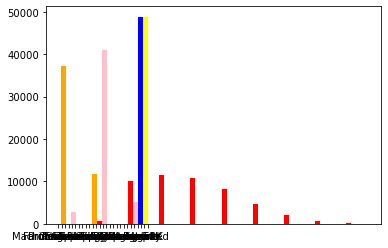

In [34]:
# histogram

import matplotlib.pyplot as plt

# plt.xlabel('showing occupation')
# plt.ylabel('age')
# plt.title('checking field with their age')

# plt.hist([dataset.age, dataset.occupation, dataset.workclass],  rwidth=0.95 , color=['orange','red','pink'])

plt.hist([dataset.occupation,dataset.age,dataset.workclass,dataset.gender,dataset.income],
         color=['orange','red','pink','blue','yellow'])

Observation : gender and income are correlated each other at same level.

<AxesSubplot:xlabel='age'>

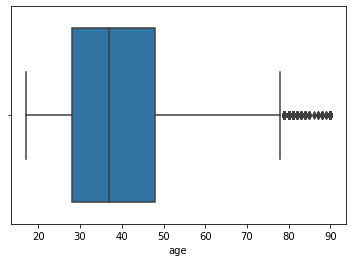

In [35]:
# boxplot - for single column
import seaborn as sns
sns.boxplot(x=dataset['age'])

Observation : Here is the boxplot of single value that is age.

<AxesSubplot:xlabel='age', ylabel='occupation'>

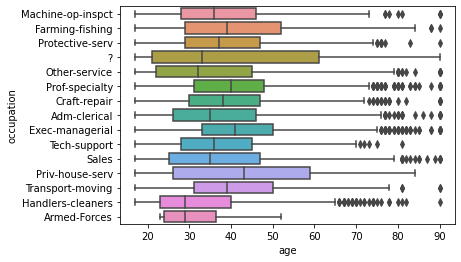

In [36]:
# boxplot - for multiple column
sns.boxplot(x='age',y='occupation',data=dataset)

Observation : Here is the boxplot for age and occupation ,
    where occupation and age are plotted in same box when they are in same category

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

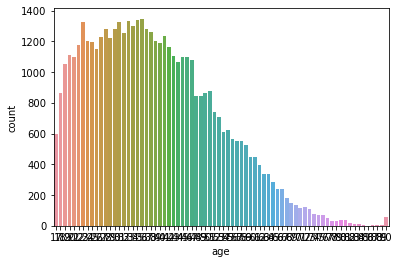

In [37]:
# countpl

sns.countplot('age',data=dataset)

Observation : here is the countplot for age data where data are goes down.